In [1]:
import numpy as np # linear algebra`13457
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
import math 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [4]:
test.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [5]:
from sklearn.metrics import mean_squared_error as mse

In [6]:
#For norating1
c=0
for i in range(len(train)):
    s5=pd.isna(train['star_5f'][i])
    s4=pd.isna(train['star_4f'][i])
    s3=pd.isna(train['star_3f'][i])
    nr=pd.isna(train['norating1'][i])
    if(s5==False and s4==False and s3==False and nr==True):
        train['norating1'][i]=train['star_3f'][i]+train['star_5f'][i]+train['star_4f'][i]+train['star_2f'][i]+train['star_1f'][i]
        c+=1
c

38

In [7]:
cnt=0
for i in range(len(test)):
    if(pd.isna(test['star_5f'][i])&pd.isna(test['star_1f'][i])):
        cnt+=1
    elif(pd.isna(test['star_5f'][i])):
        test['star_5f'][i]=test['norating1'][i]-(test['star_1f'][i]+test['star_2f'][i]+test['star_3f'][i]+test['star_4f'][i])
    elif(pd.isna(test['star_1f'][i])):
        test['star_1f'][i]=test['norating1'][i]-(test['star_5f'][i]+test['star_2f'][i]+test['star_3f'][i]+test['star_4f'][i])
    else:
        continue
cnt

45

In [8]:
for i in range(len(test)):
    if(pd.isna(test['star_5f'][i])&pd.isna(test['star_1f'][i])):
        test['star_5f'][i]=round((test['norating1'][i]-test['star_2f'][i]-test['star_3f'][i]-test['star_4f'][i])/2)
        test['star_1f'][i]=test['norating1'][i]-test['star_2f'][i]-test['star_3f'][i]-test['star_4f'][i]-test['star_5f'][i]

In [9]:
for i in range(len(test)):
    if(pd.isna(test['Rating'][i])):
        if(test['norating1'][i]==0):
            test['Rating'][i]=0
        else:
            test['Rating'][i]=(test['star_5f'][i]*5+test['star_4f'][i]*4+test['star_3f'][i]*3+test['star_2f'][i]*2+test['star_1f'][i]*1)/test['norating1'][i]

In [10]:
def fill_maincateg(df):
    for ind, item in enumerate(df.maincateg):
        if(item!="Men" and item != "Women"):
            if("Men" in df.title[ind]):
                df.loc[ind, "maincateg"] = 'Men'
            else:
                df.loc[ind, "maincateg"] = 'Women'
    print("Done")
    
    return df

In [11]:
fill_maincateg(train)
fill_maincateg(test)

Done
Done


,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.800000,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.900000,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.900000,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.900000,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.900000,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,Women Off White Flats Sandal,3.212955,Women,Flipkart,699,1235,153,348.0,323,155,62,347.0,1
5240,297,Slip On For Men (Tan),3.900000,Men,Flipkart,1993,329,56,350.0,37,60,5,37.0,0
5241,18733,Women Grey Heels Sandal,3.800000,Women,Flipkart,999,1280,135,574.0,290,172,94,150.0,0
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,3.900000,Women,Flipkart,499,4867,574,2384.0,974,648,328,533.0,0


In [12]:
train["noreviews1"] = train["noreviews1"].fillna(train["noreviews1"].mean())
train["star_5f"] = train["star_5f"].fillna(train["star_5f"].mean())
train["star_4f"] = train["star_4f"].fillna(train["star_4f"].mean())
train["star_3f"] = train["star_3f"].fillna(train["star_3f"].mean())

In [13]:
train['maincateg'].replace({'Men':1, 'Women':0}, inplace=True)
train['platform'].replace({'Flipkart':1, 'Amazon':0}, inplace=True)

In [14]:
coloumn=['star_5f','star_4f','star_3f','star_2f','star_1f']
train['norating1'] = train[coloumn].sum(axis=1)

In [15]:
test["star_5f"] = test["star_5f"].fillna(test["star_5f"].mean())
test["star_1f"] = test["star_1f"].fillna(test["star_1f"].mean())

In [16]:
test['maincateg'].replace({'Men':1, 'Women':0}, inplace=True)
test['platform'].replace({'Flipkart':1, 'Amazon':0}, inplace=True)

In [17]:
test["Rating"] = test["Rating"].fillna(test["Rating"].mean())

In [18]:
#Saving id from test
ID=pd.DataFrame(test['id'])
ID.head()

,id
0,2242
1,20532
2,10648
3,20677
4,12593


In [19]:
#Drop id from both
train.drop(['id'], axis=1,inplace=True)
test.drop(['id'], axis=1,inplace=True)

In [20]:
#Dropping 'offer' column
train.drop(['Offer %'], axis=1,inplace=True)

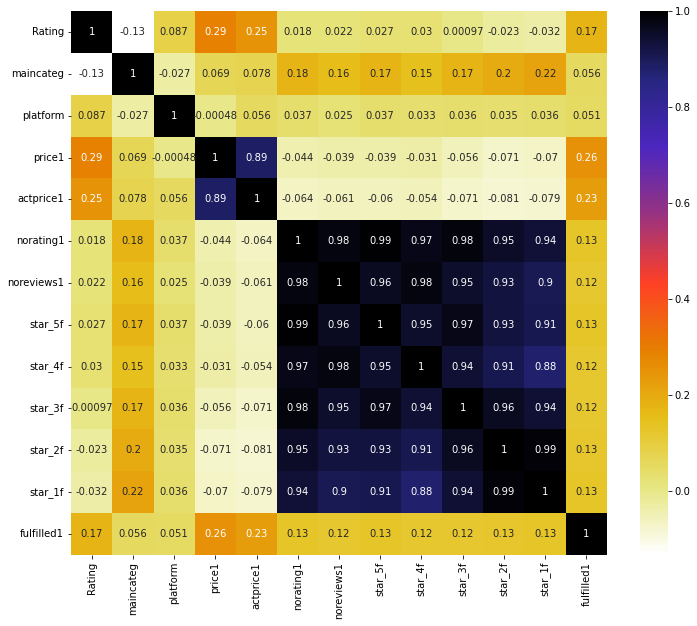

In [21]:
#Plotting Correlation Matrix
plt.figure(figsize=(12,10))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [22]:
train = train.drop(['star_5f','star_4f','star_3f','star_2f','star_1f'], axis=1)
test = test.drop(['star_5f','star_4f','star_3f','star_2f','star_1f'], axis=1)

In [23]:
#Now Drop 'Title'
train.drop(['title'], axis=1,inplace=True)
test.drop(['title'], axis=1,inplace=True)

In [24]:
train.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,fulfilled1
0,3.9,0,1,698,999,38.0,7.0,0
1,3.8,1,1,999,1999,531.0,69.0,1
2,4.4,0,1,2749,4999,17.0,4.0,1
3,4.2,1,1,518,724,24109.0,6229.0,1
4,3.9,1,1,1379,2299,77.0,3.0,1


In [25]:
test.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,fulfilled1
0,3.8,1,1,999,27928,3543,1
1,3.9,0,1,499,3015,404,1
2,3.9,0,1,999,449,52,1
3,3.9,1,1,2999,290,40,1
4,3.9,1,1,999,2423,326,0


In [26]:
#Seperating X & y
X = train.drop(['price1'], axis=1)
y = train['price1']

In [27]:
#Splitting data into x_train and x_test(for train.csv file)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = None)

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import plot_tree, plot_importance
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [29]:
#Gaussian Naive Bayes
tr=GaussianNB()
tr.fit(X_train,y_train)
y_pred=tr.predict(X_test)
math.sqrt(mse(y_test, y_pred))

389.6676493970852

In [30]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred=lr.predict(X_test)
math.sqrt(mse(y_test, y_pred))

292.1536511528285

In [31]:
#Lasso Regression
from sklearn import linear_model
lR = linear_model.Lasso(alpha=0.4)
lR.fit(X_test,y_test)
y_pred=lR.predict(X_test)
math.sqrt(mse(y_test, y_pred))

290.9855967276009

In [384]:
#Ridge Regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_test, y_test)
y_pred=rr.predict(X_test)
math.sqrt(mse(y_test, y_pred))

290.9958483368302

In [258]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Build decision tree
tree=DecisionTreeRegressor(max_depth=20)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
math.sqrt(mse(y_test, y_pred))

277.81502108616814

In [151]:
#Neural Network
from keras.layers import Dense, Activation
from keras.models import Sequential
nn = Sequential()
nn.add(Dense(32, activation = 'relu', input_dim = 7))
nn.add(Dense(units = 32, activation = 'relu'))
nn.add(Dense(units = 32, activation = 'relu'))
nn.add(Dense(units = 1))
nn.compile(optimizer = 'adam', loss = 'mean_squared_error')
nn.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = nn.predict(X_test)
y_pred=nn.predict(X_test)
math.sqrt(mse(y_test, y_pred))

Epoch 1/100
1180/1180 [==============================] - 2s 1ms/step - loss: 123351.8359
Epoch 2/100
1180/1180 [==============================] - 1s 1ms/step - loss: 112220.3125
Epoch 3/100
1180/1180 [==============================] - 1s 1ms/step - loss: 95117.3359
Epoch 4/100
1180/1180 [==============================] - 1s 1ms/step - loss: 93577.7031
Epoch 5/100
1180/1180 [==============================] - 1s 1ms/step - loss: 94876.0938
Epoch 6/100
1180/1180 [==============================] - 1s 1ms/step - loss: 94551.7266
Epoch 7/100
1180/1180 [==============================] - 1s 1ms/step - loss: 95690.2891
Epoch 8/100
1180/1180 [==============================] - 2s 1ms/step - loss: 92474.4375
Epoch 9/100
1180/1180 [==============================] - 2s 1ms/step - loss: 91610.2266
Epoch 10/100
1180/1180 [==============================] - 1s 1ms/step - loss: 92941.6641
Epoch 11/100
1180/1180 [==============================] - 1s 1ms/step - loss: 92544.6172
Epoch 12/100
1180/1180 [====

290.2865940369999

In [152]:
#KNN
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_pred=knn.predict(X_test) #make prediction on test set
    error = math.sqrt(mse(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 278.54396037096296
RMSE value for k=  2 is: 263.4657132329105
RMSE value for k=  3 is: 262.5919287813448
RMSE value for k=  4 is: 266.5049609527621
RMSE value for k=  5 is: 269.5607520655727
RMSE value for k=  6 is: 270.5017286046846
RMSE value for k=  7 is: 271.34704522655124
RMSE value for k=  8 is: 273.4363236562543
RMSE value for k=  9 is: 275.1664622747592
RMSE value for k=  10 is: 275.04460369615464
RMSE value for k=  11 is: 275.2175757064252
RMSE value for k=  12 is: 277.3130565800343
RMSE value for k=  13 is: 279.14389951510964
RMSE value for k=  14 is: 280.21945202546345
RMSE value for k=  15 is: 281.6559615464111
RMSE value for k=  16 is: 281.84820928162844
RMSE value for k=  17 is: 283.22107374938275
RMSE value for k=  18 is: 284.3385215887271
RMSE value for k=  19 is: 285.55656652854657
RMSE value for k=  20 is: 286.17231891025983


In [153]:
#SVM
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_rbf=SVR(C=1.0, epsilon=0.4, kernel='rbf')

# Training of the regression model
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
math.sqrt(mse(y_test, y_pred))

589.1048481581198

In [154]:
#Light GBM
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
math.sqrt(mse(y_test, y_pred))

644.0632935213205

In [155]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor(n_estimators=100)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
math.sqrt(mse(y_test,y_pred))

304.3446623432367

In [33]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr = RandomForestRegressor(max_depth=30,max_features=5,min_samples_leaf=1,min_samples_split=2,n_estimators=580,bootstrap=True)
rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)
math.sqrt(mse(y_test, y_pred))

212.95462963057162

In [354]:
#Extreme Gradient Boosting
import xgboost as xg
xgb_r = xg.XGBRegressor(max_depth=6, n_estimators=700,learning_rate=0.4,gamma=0.7,eval_metric='rmse')
xgb_r.fit(X_train, y_train)
y_pred=xgb_r.predict(X_test)
math.sqrt(mse(y_test, y_pred))

228.10433360229936

In [355]:
#Stacking
models1=[('rfr',RandomForestRegressor(max_depth=30,max_features=5,min_samples_leaf=1,min_samples_split=2,n_estimators=580,bootstrap=True)),
         ('xgb_r',xg.XGBRegressor(max_depth=6, n_estimators=700,learning_rate=0.4,gamma=0.7,eval_metric='rmse'))]

In [356]:
meta=LinearRegression()

In [357]:
from sklearn.ensemble import StackingRegressor
stack=StackingRegressor(estimators=models1,final_estimator=meta,cv=5)

In [103]:
stack.fit(X_train, y_train)
y_pred=stack.predict(X_test)
math.sqrt(mse(y_test, y_pred))

210.38586512530736

In [358]:
test.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,fulfilled1
0,3.8,1,1,999,27928,3543,1
1,3.9,0,1,499,3015,404,1
2,3.9,0,1,999,449,52,1
3,3.9,1,1,2999,290,40,1
4,3.9,1,1,999,2423,326,0


In [163]:
ss = {
    'max_depth': [20,25, 30, 40],
    'max_features': [3,5,6],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [1,2,3],
    'n_estimators': [500,550,600]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=rfr,
               param_grid=ss,
               scoring=["r2","neg_root_mean_squared_error"],
                cv=3,
                n_jobs=-1,
                verbose=2,refit=False)
gs.fit(X_train,y_train)

In [34]:
rfr = RandomForestRegressor(max_depth=30,max_features=5,min_samples_leaf=1,min_samples_split=2,n_estimators=580,bootstrap=True)
rfr.fit(X, y)
y_pred1=rfr.predict(test)

In [386]:
xgb_r = xg.XGBRegressor(max_depth=6, n_estimators=700,learning_rate=0.4,gamma=0.7,eval_metric='rmse')
xgb_r.fit(X, y)
y_pred2=xgb_r.predict(test)

In [387]:
y_pred=y_pred1

In [388]:
for i in range(len(y_pred1)):
    y_pred[i]=(y_pred1[i]+y_pred2[i])/2

In [389]:
stack=StackingRegressor(estimators=models1,final_estimator=rr,cv=5)
stack.fit(X, y)
y_pred4=stack.predict(test)

In [390]:
for i in range(len(y_pred)):
    y_pred[i]=(y_pred[i]+y_pred4[i])/2

In [391]:
res1=pd.DataFrame(y_pred)
res1.columns = ["price1"]
ID['price1']=res1['price1']
ID.to_csv("pred_Stack.csv", index = False)

In [392]:
y_pred.shape

(5244,)